<a href="https://colab.research.google.com/github/ManjilRohine/Secure-file-management-system/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
mport pandas as pd
df = pd.read_csv('/content/labeled_data.csv')
df


,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies


In [ ]:
import pandas as pd
import re
df = pd.read_csv('/content/labeled_data.csv')
df
df = df[['tweet', 'class']]
df = df.rename(columns={'class': 'label'})
def clean_tweet(text):
    text = str(text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'#\w+', '', text)
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    text = text.lower()
    return text
df['cleaned_tweet'] = df['tweet'].apply(clean_tweet)
print(df[['label', 'cleaned_tweet']].head())

   label                                      cleaned_tweet
0      2  rt as a woman you shouldnt complain about clea...
1      1  rt boy dats coldtyga dwn bad for cuffin dat ho...
2      1  rt dawg rt you ever fuck a bitch and she start...
3      1                          rt she look like a tranny
4      1  rt the shit you hear about me might be true or...


In [ ]:
import pandas as pd

print("Missing values per column:\n", df.isnull().sum())
print("\nRows with missing data:\n")
print(df[df.isnull().any(axis=1)].head())
df_cleaned = df.dropna()
df_cleaned = df_cleaned.reset_index(drop=True)
print("\nAfter dropping, missing values:\n", df_cleaned.isnull().sum())


Missing values per column:
 tweet            0
label            0
cleaned_tweet    0
dtype: int64

Rows with missing data:

Empty DataFrame
Columns: [tweet, label, cleaned_tweet]
Index: []

After dropping, missing values:
 tweet            0
label            0
cleaned_tweet    0
dtype: int64


<ipython-input-4-cb1936f7d948>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data_types.index.astype(str), y=data_types.values, palette="viridis")


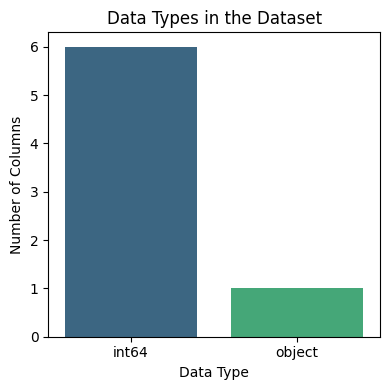

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('/content/labeled_data.csv')
data_types = df.dtypes.value_counts()
plt.figure(figsize=(4, 4))
sns.barplot(x=data_types.index.astype(str), y=data_types.values, palette="viridis")
plt.title("Data Types in the Dataset")
plt.xlabel("Data Type")
plt.ylabel("Number of Columns")
plt.tight_layout()
plt.show()

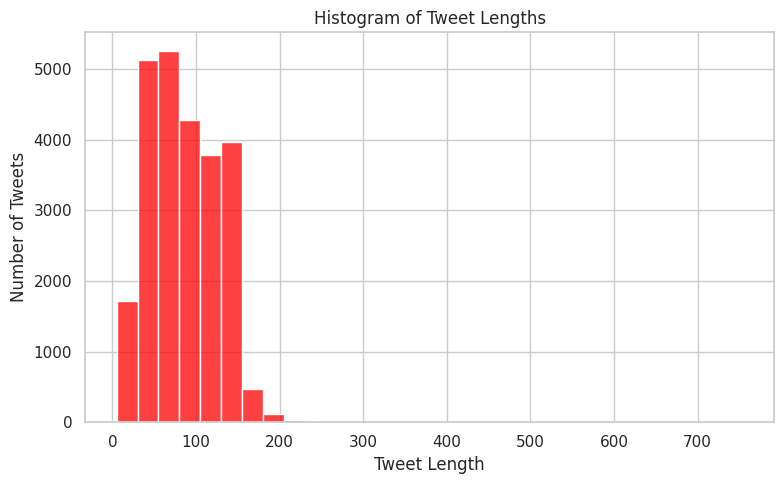

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('/content/labeled_data.csv')
df['tweet_length'] = df['tweet'].str.len()
plt.figure(figsize=(8, 5))
sns.histplot(df['tweet_length'], bins=30, color='red')
plt.title("Histogram of Tweet Lengths")
plt.xlabel("Tweet Length")
plt.ylabel("Number of Tweets")
plt.tight_layout()
plt.show()

<ipython-input-11-b1f8118c8caf>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='label', palette=custom_palette)


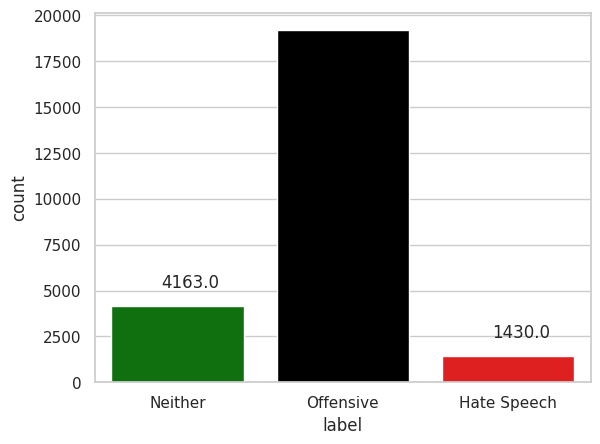

<Figure size 800x600 with 0 Axes>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('/content/labeled_data.csv')
label_map = {0: "Hate Speech", 1: "Offensive", 2: "Neither"}
df['label'] = df['class'].map(label_map)
sns.set(style="whitegrid")
custom_palette = ['green', 'black', 'red']
ax = sns.countplot(data=df, x='label', palette=custom_palette)
plt.figure(figsize=(8, 6))
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + 0.3, p.get_height() + 1000), fontsize=12)
#plt.title("Distribution of Tweet Classes", fontsize=16)

plt.tight_layout()
plt.show()

(np.float64(-1.0999897645830383),
 np.float64(1.0999947022219774),
 np.float64(-1.0999896742722615),
 np.float64(1.0999923633802628))

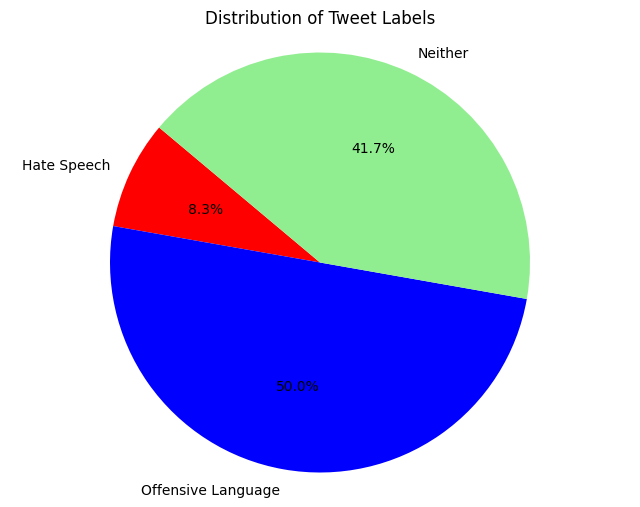

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

labels = ['Hate Speech', 'Offensive Language', 'Neither']
sizes = [500, 3000, 2500]
colors = ['red', 'blue', 'lightgreen']  # Fixed color name

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Distribution of Tweet Labels')
plt.axis('equal')

                                               tweet  class
0  !!! RT @mayasolovely: As a woman you shouldn't...      2
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...      1
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...      1
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...      1
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...      1


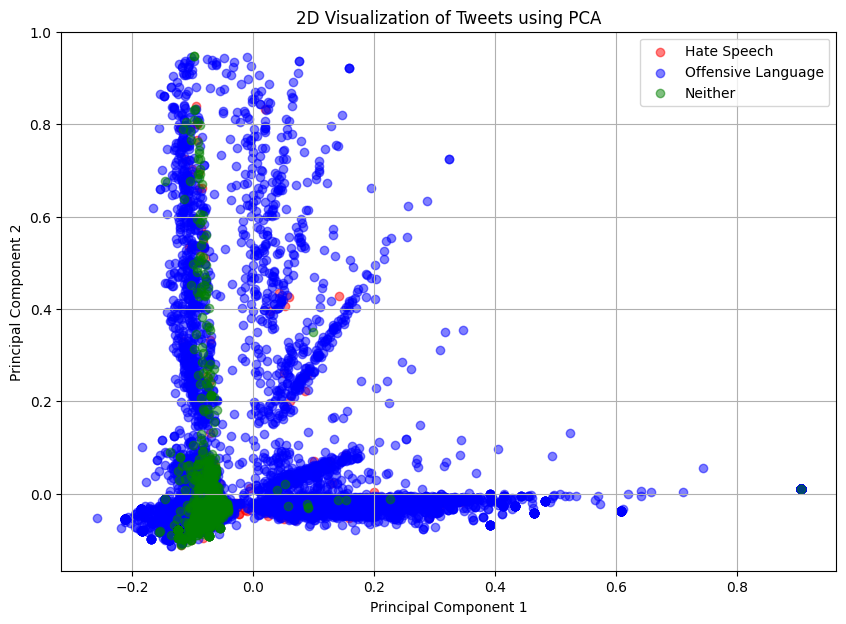

In [ ]:
#Dimensionality Reduction using PCA



import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

df = pd.read_csv("/content/labeled_data.csv")
print(df[['tweet', 'class']].head())
label_map = {0: 'Hate Speech', 1: 'Offensive Language', 2: 'Neither'}
df['label'] = df['class'].map(label_map)
tfidf = TfidfVectorizer(stop_words='english', max_features=1000)
X_tfidf = tfidf.fit_transform(df['tweet'].astype(str))

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_tfidf.toarray())

plt.figure(figsize=(10, 7))
colors = ['red', 'blue', 'green']
for i, label in enumerate(label_map.values()):
    plt.scatter(
        X_pca[df['label'] == label, 0],
        X_pca[df['label'] == label, 1],
        label=label,
        alpha=0.5,
        c=colors[i]
    )

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D Visualization of Tweets using PCA')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Regularization


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

X = X_tfidf
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model_l2 = LogisticRegression(penalty='l2', solver='liblinear', C=1.0)
model_l2.fit(X_train, y_train)
y_pred_l2 = model_l2.predict(X_test)

print("L2 Regularization (Ridge) Results:")
print(classification_report(y_test, y_pred_l2, target_names=label_map.values()))


model_l1 = LogisticRegression(penalty='l1', solver='liblinear', C=1.0)
model_l1.fit(X_train, y_train)
y_pred_l1 = model_l1.predict(X_test)

print("\nL1 Regularization (Lasso) Results:")
print(classification_report(y_test, y_pred_l1, target_names=label_map.values()))

L2 Regularization (Ridge) Results:
                    precision    recall  f1-score   support

       Hate Speech       0.46      0.14      0.22       290
Offensive Language       0.90      0.96      0.93      3832
           Neither       0.83      0.79      0.81       835

          accuracy                           0.88      4957
         macro avg       0.73      0.63      0.65      4957
      weighted avg       0.87      0.88      0.87      4957


L1 Regularization (Lasso) Results:
                    precision    recall  f1-score   support

       Hate Speech       0.45      0.17      0.25       290
Offensive Language       0.93      0.95      0.94      3832
           Neither       0.81      0.91      0.86       835

          accuracy                           0.90      4957
         macro avg       0.73      0.68      0.68      4957
      weighted avg       0.88      0.90      0.89      4957



In [ ]:
# y=mx+b -> slope and intercept






model = LogisticRegression(penalty='l2', solver='liblinear', C=1.0)
model.fit(X_train, y_train)

feature_names = tfidf.get_feature_names_out()

coefs = model.coef_
intercept = model.intercept_


import numpy as np

top_indices = np.argsort(coefs[0])[::-1][:10]
print("Top 10 influential words (slope) for Hate Speech class:")
for idx in top_indices:
    print(f"{feature_names[idx]}: {coefs[0][idx]:.4f}")

print(f"\nIntercept (bias) for each class: {intercept}")

Top 10 influential words (slope) for Hate Speech class:
faggots: 4.5164
niggers: 4.3974
faggot: 4.1314
white: 4.1046
nigger: 3.9068
fags: 3.4751
queer: 3.0730
fag: 3.0331
racist: 2.9887
dyke: 2.9609

Intercept (bias) for each class: [-2.87453241 -0.19201993 -0.2592946 ]


In [ ]:
# XGboost



import xgboost as xgb
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

X = X_tfidf
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_map.values()))

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:12:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Classification Report:
                    precision    recall  f1-score   support

       Hate Speech       0.51      0.23      0.32       290
Offensive Language       0.94      0.94      0.94      3832
           Neither       0.79      0.94      0.86       835

          accuracy                           0.90      4957
         macro avg       0.75      0.71      0.71      4957
      weighted avg       0.89      0.90      0.89      4957



In [ ]:
#   Cross Validation


from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
import numpy as np

log_reg = LogisticRegression(penalty='l2', solver='liblinear', C=1.0)
log_scores = cross_val_score(log_reg, X, y, cv=5, scoring='f1_macro')
print("Logistic Regression 5-Fold CV F1 Scores:", log_scores)
print("Average F1 Score:", np.mean(log_scores))

xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_scores = cross_val_score(xgb_clf, X, y, cv=5, scoring='f1_macro')
print("\nXGBoost 5-Fold CV F1 Scores:", xgb_scores)
print("Average F1 Score:", np.mean(xgb_scores))

Logistic Regression 5-Fold CV F1 Scores: [0.66724702 0.68354975 0.65369931 0.65691328 0.65355176]
Average F1 Score: 0.662992225574361


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:14:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:15:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:15:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:15:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:15:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e


XGBoost 5-Fold CV F1 Scores: [0.71535448 0.71195818 0.70554515 0.68866779 0.70361475]
Average F1 Score: 0.7050280685329025


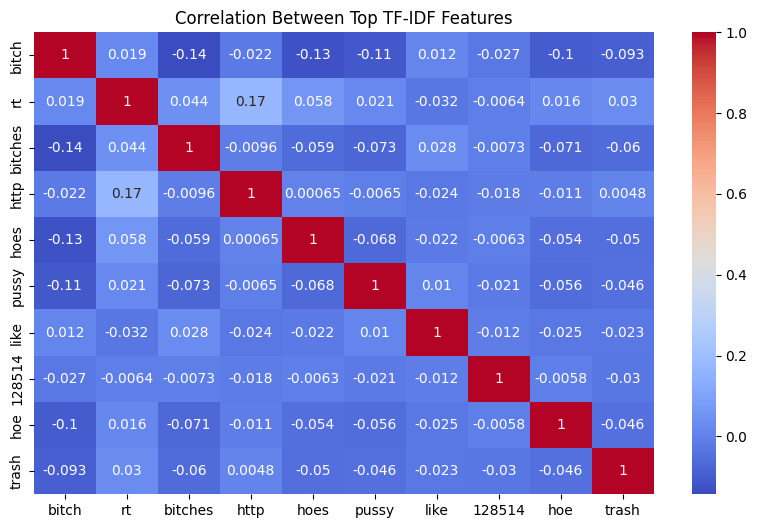

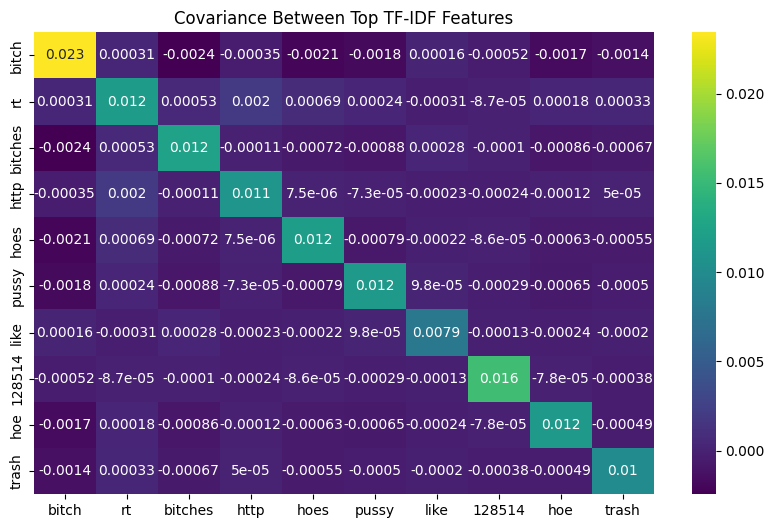

In [ ]:
#Correlation & Covariance


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
top_n = 10
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())
top_features = tfidf_df.sum().sort_values(ascending=False).head(top_n).index

subset_df = tfidf_df[top_features]

corr_matrix = subset_df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Between Top TF-IDF Features")
plt.show()

cov_matrix = subset_df.cov()
plt.figure(figsize=(10, 6))
sns.heatmap(cov_matrix, annot=True, cmap='viridis')
plt.title("Covariance Between Top TF-IDF Features")
plt.show()

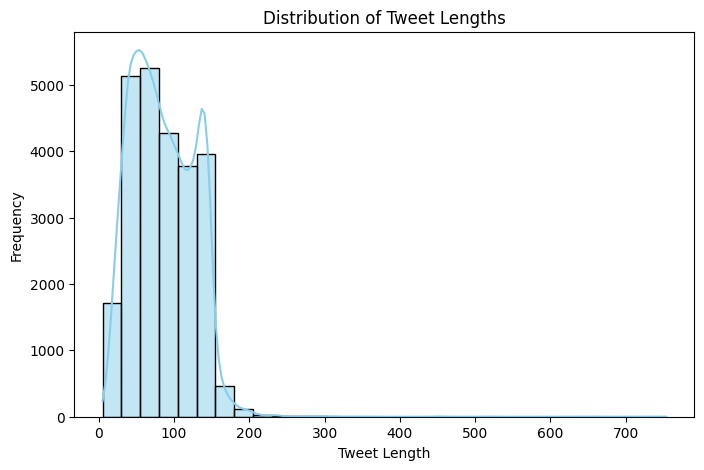

In [ ]:
# Univariate Analysis


df['tweet_length'] = df['tweet'].apply(len)

# Plot histogram of tweet lengths
plt.figure(figsize=(8, 5))
sns.histplot(df['tweet_length'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Tweet Lengths')
plt.xlabel('Tweet Length')
plt.ylabel('Frequency')
plt.show()

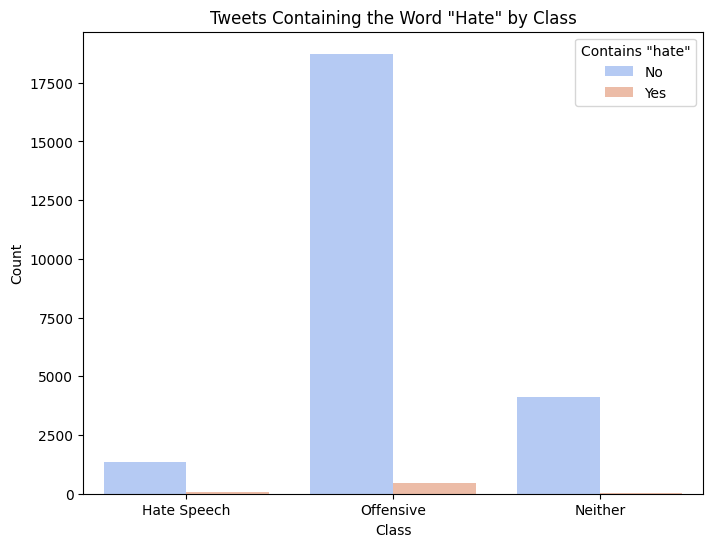

In [ ]:
#Bivariate Analysis



df['contains_hate'] = df['tweet'].str.lower().str.contains('hate').astype(int)

# Countplot: How many tweets contain "hate" by class
plt.figure(figsize=(8, 6))
sns.countplot(x='class', hue='contains_hate', data=df, palette='coolwarm')
plt.xticks(ticks=[0, 1, 2], labels=['Hate Speech', 'Offensive', 'Neither'])
plt.title('Tweets Containing the Word "Hate" by Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.legend(title='Contains "hate"', labels=['No', 'Yes'])
plt.show()



<ipython-input-16-77341f1a1389>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['class'] = df['class']


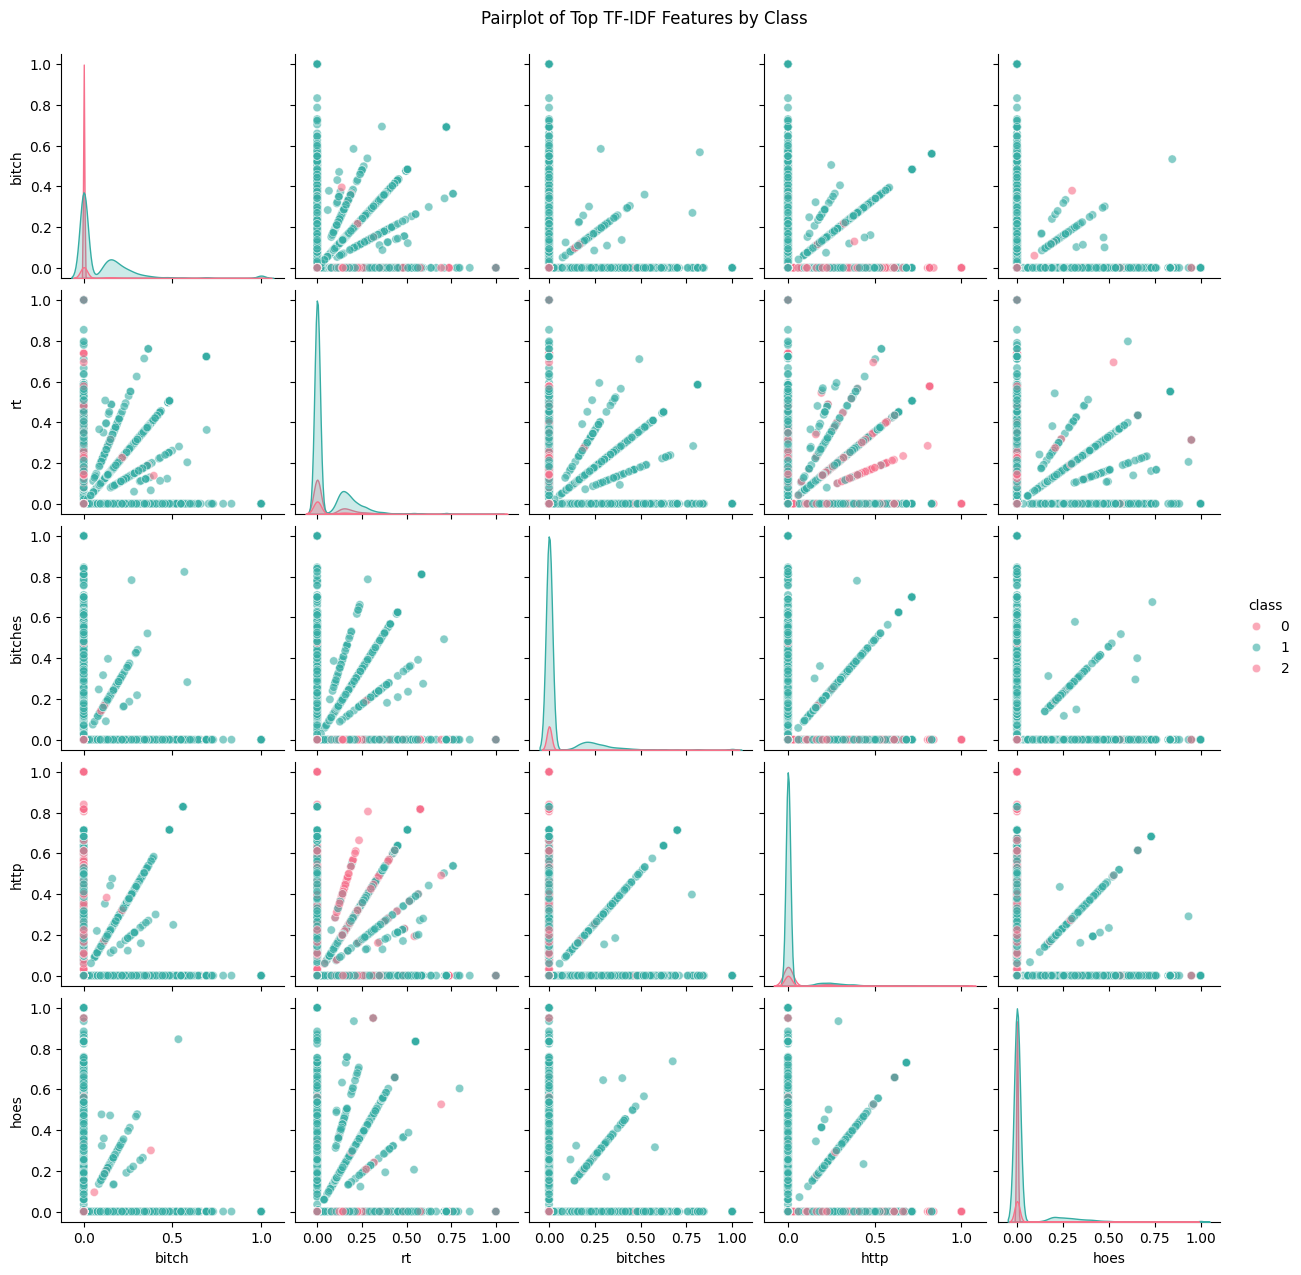

In [ ]:
#Multivariate Analysis


from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import seaborn as sns

# Use a small subset of TF-IDF for visualization
top_words = 5
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())
top_features = tfidf_df.sum().sort_values(ascending=False).head(top_words).index
subset_df = tfidf_df[top_features]
subset_df['class'] = df['class']

# Plot pairplot
sns.pairplot(subset_df, hue='class', palette='husl', plot_kws={'alpha': 0.6})
plt.suptitle("Pairplot of Top TF-IDF Features by Class", y=1.02)
plt.show()

In [ ]:
# finally the last one removing all the hate speech

print("Original dataset shape:", df.shape)

# Remove rows where class == 0 (Hate Speech)
df_no_hate = df[df['class'] != 0]

# Reset index
df_no_hate.reset_index(drop=True, inplace=True)

# Display new shape
print("Dataset shape after removing hate speech:", df_no_hate.shape)

Original dataset shape: (24783, 10)
Dataset shape after removing hate speech: (23353, 10)


Tweet counts by class after removing hate speech:
class
1    19190
2     4163
Name: count, dtype: int64


<ipython-input-18-d2525439cc7d>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='class', data=df_no_hate, palette='Set2')


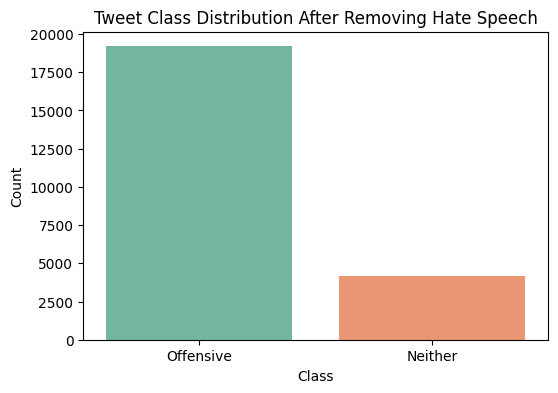

In [ ]:
class_counts = df_no_hate['class'].value_counts()

# Print the counts
print("Tweet counts by class after removing hate speech:")
print(class_counts)

# Optional: Show it as a bar plot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.countplot(x='class', data=df_no_hate, palette='Set2')
plt.title("Tweet Class Distribution After Removing Hate Speech")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(ticks=[0, 1], labels=['Offensive', 'Neither'])
plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128150 (\N{SPARKLING HEART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


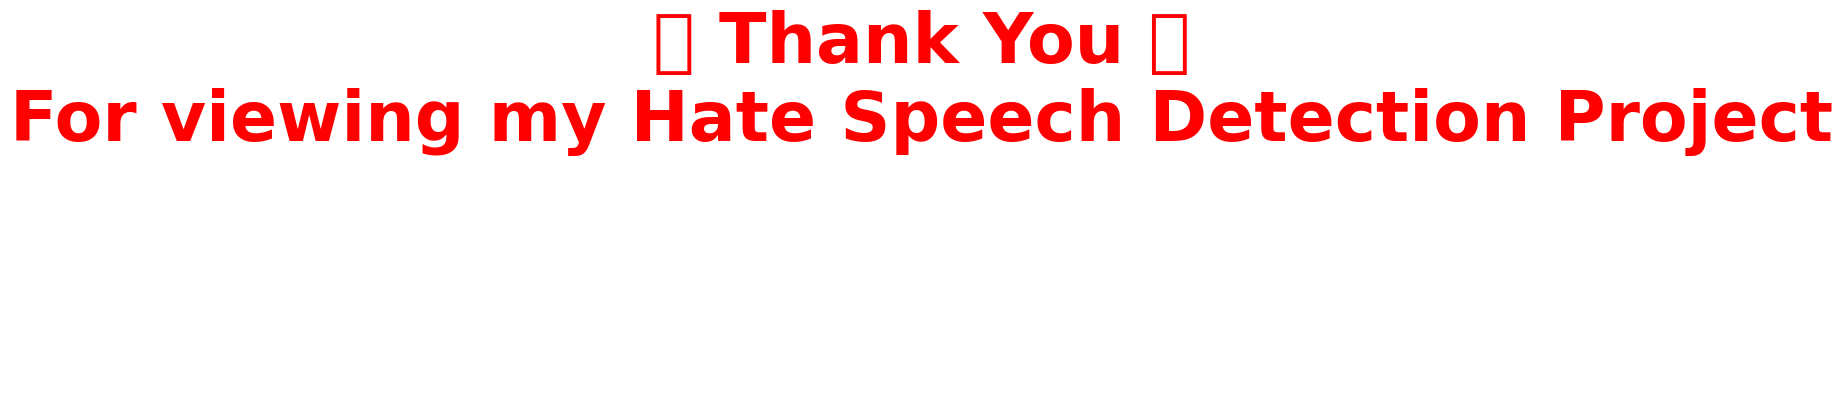

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.text(1.0, 1.0, '💖 Thank You 💖\nFor viewing my Hate Speech Detection Project',
         fontsize=50, ha='center', va='center', color='red', fontweight='bold')
plt.axis('off')
plt.show()